<a href="https://colab.research.google.com/github/mooskiiiie/Manila-Sea-Level-Forecast/blob/main/TimeSeriesForecasting_ManilaSeaLevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime

In [42]:
df = pd.read_csv("data2.csv")

In [3]:
df.head()

,Date,Sea_level
0,1902,6677
1,1903,6655
2,1904,6689
3,1905,6678
4,1906,6727


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Date       119 non-null    int64
 1   Sea_level  119 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [43]:
# converting date column into datetime 
df['date'] = pd.to_datetime(df['Date'], format='%Y')

In [44]:
# setting the date column as our index
df = df.set_index('date')
df.head()

,Date,Sea_level
date,,
1902-01-01,1902,6677
1903-01-01,1903,6655
1904-01-01,1904,6689
1905-01-01,1905,6678
1906-01-01,1906,6727


In [45]:
# dropping unnecessary columns
df.drop(columns=['Date'], inplace=True)

In [9]:
df.head()

,Sea_level
date,
1902-01-01,6677
1903-01-01,6655
1904-01-01,6689
1905-01-01,6678
1906-01-01,6727


In [46]:
# Checking if there are any negative values 
(df < 0).values.any()

True

In [47]:
# Removing any negative values that may affect the plot
df = df[df.select_dtypes(include=[np.number]).ge(0).all(1)]

# Plotting Time Series

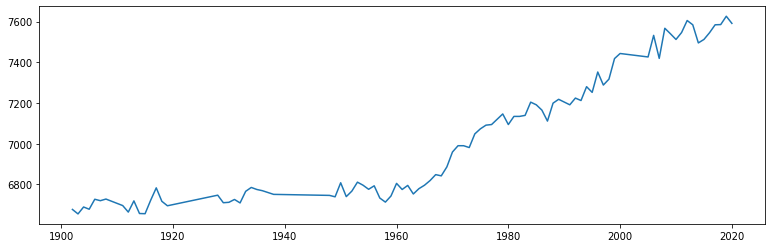

In [12]:
fig = plt.figure(figsize=(13,4))
plt.plot(df.index, df['Sea_level'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.01, 'Manila Yearly Sea Level Rise')

<Figure size 432x288 with 0 Axes>

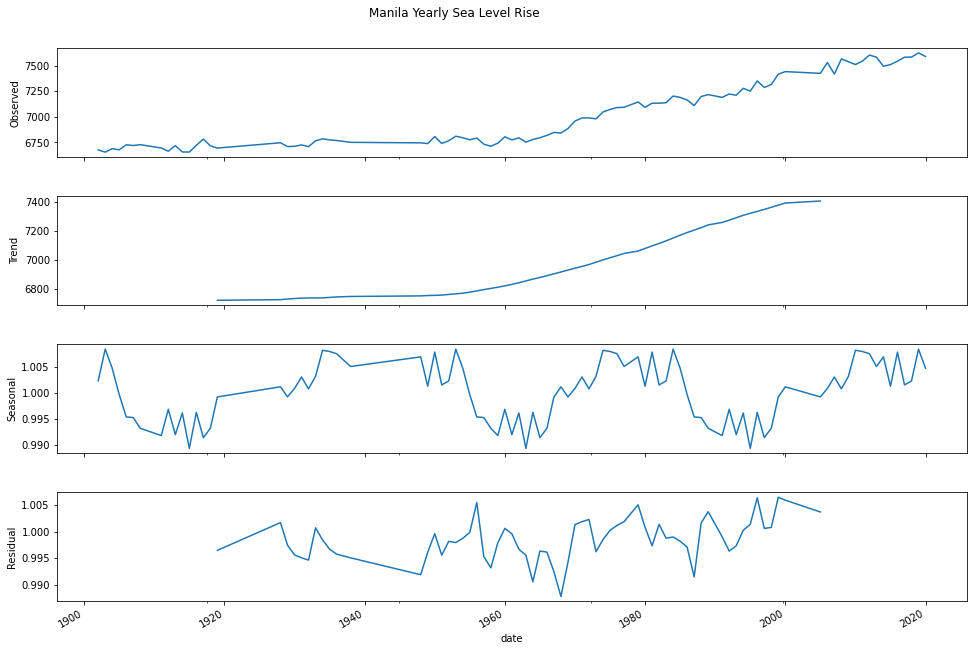

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sea_level'], model='multiplicative', freq=30)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)
plt.suptitle("Manila Yearly Sea Level Rise", y=1.01)

In [274]:
next_years = [pd.to_datetime('2021-01-01'),
              pd.to_datetime('2022-01-01'),
              pd.to_datetime('2023-01-01'),
              pd.to_datetime('2024-01-01'),
              pd.to_datetime('2025-01-01'),
              pd.to_datetime('2026-01-01'),
              pd.to_datetime('2027-01-01'),
              pd.to_datetime('2028-01-01'),
              pd.to_datetime('2029-01-01'),
              pd.to_datetime('2030-01-01'),
              pd.to_datetime('2031-01-01')]
test2 = pd.Series(next_years)

In [22]:
test2 = pd.DataFrame(test2, columns=['date'])
test2['date'] = pd.to_datetime(test2['date'], format='%Y')
test2.head()

,date
0,2021-01-01
1,2022-01-01
2,2023-01-01
3,2024-01-01
4,2025-01-01


In [30]:
####

In [212]:
ts = df['Sea_level']

In [214]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    alpha = 1e-3
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:  # null hypothesis: x is non stationary
        print("X is stationary")
        return True
    else:
        print("X is not stationary")
        return False

In [215]:
ts_diff = pd.Series(ts)
d = 0
while test_stationarity(ts_diff) is False:
    ts_diff = ts_diff.diff().dropna()
    d = d + 1

X is not stationary
X is stationary


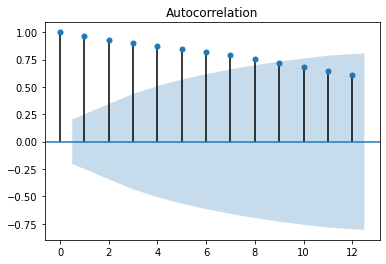

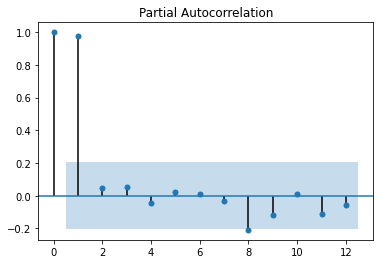

In [216]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Sea_level'], lags =12)
plt.show()
plot_pacf(df['Sea_level'], lags =12)
plt.show()

In [243]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 8
q = 1
model = SARIMAX(ts, order=(p,d,q))
model_fit = model.fit(disp=1,solver='powell')
    
fcast = model_fit.get_prediction(start=1, end=len(ts)+10)
ts_p = fcast.predicted_mean
ts_ci = fcast.conf_int()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [244]:
ts_p

1      6672.617504
2      6660.713245
3      6680.107960
4      6680.561174
5      6712.536866
          ...     
99     7684.300158
100    7697.651936
101    7707.981910
102    7717.447887
103    7727.598937
Length: 103, dtype: float64

In [299]:
df2 = pd.read_csv('data2.csv')
df2['date'] = pd.to_datetime(df2['Date'], format='%Y')
#df.set_index('date', inplace=True)
df2 = df2[df2.select_dtypes(include=[np.number]).ge(0).all(1)]
df2.drop(columns=['Date', 'Sea_level'], inplace=True)

In [300]:
df2.reset_index(inplace=True)

In [301]:
df2.drop(columns=['index'], inplace=True)

In [302]:
df2

,date
0,1902-01-01
1,1903-01-01
2,1904-01-01
3,1905-01-01
4,1906-01-01
...,...
88,2016-01-01
89,2017-01-01
90,2018-01-01
91,2019-01-01


In [ ]:
test2 = test2.to_frame()

In [285]:
test2.reset_index(inplace=True)
test2.drop(columns=['index'], inplace=True)
test2.rename(columns= {0: "date"}, inplace=True)

In [305]:
df2 = df2.append(test2, ignore_index=True)

In [306]:
df2

,date
0,1902-01-01
1,1903-01-01
2,1904-01-01
3,1905-01-01
4,1906-01-01
...,...
99,2027-01-01
100,2028-01-01
101,2029-01-01
102,2030-01-01


In [307]:
ts_p

1      6672.617504
2      6660.713245
3      6680.107960
4      6680.561174
5      6712.536866
          ...     
99     7684.300158
100    7697.651936
101    7707.981910
102    7717.447887
103    7727.598937
Length: 103, dtype: float64

In [308]:
ts_pred = ts_p.to_frame()

In [309]:
ts_pred.reset_index(inplace=True)

In [310]:
ts_pred.drop(columns=['index'], inplace=True)

In [311]:
ts_pred.rename(columns= {0: "pred"}, inplace=True)

In [312]:
ts_pred

,pred
0,6672.617504
1,6660.713245
2,6680.107960
3,6680.561174
4,6712.536866
...,...
98,7684.300158
99,7697.651936
100,7707.981910
101,7717.447887


In [313]:
df2['Sea_level'] = ts_pred['pred']

In [314]:
df2.set_index('date', inplace=True)

In [318]:
df2.dropna(inplace=True)
df2

,Sea_level
date,
1902-01-01,6672.617504
1903-01-01,6660.713245
1904-01-01,6680.107960
1905-01-01,6680.561174
1906-01-01,6712.536866
...,...
2026-01-01,7684.300158
2027-01-01,7697.651936
2028-01-01,7707.981910


In [319]:
ts_ci.reset_index(inplace=True)
ts_ci.drop(columns=['index'], inplace=True)

In [320]:
df3 = pd.read_csv('data2.csv')
df3['date'] = pd.to_datetime(df3['Date'], format='%Y')
#df.set_index('date', inplace=True)
df3 = df3[df3.select_dtypes(include=[np.number]).ge(0).all(1)]
df3.drop(columns=['Date', 'Sea_level'], inplace=True)

In [321]:
df3.reset_index(inplace=True)

In [322]:
df3.drop(columns=['index'], inplace=True)

In [323]:
df3 = df3.append(test2, ignore_index=True)

In [326]:
df3['lower Sea_level'] = ts_ci['lower Sea_level']
df3['upper Sea_level'] = ts_ci['upper Sea_level']

In [327]:
df3.set_index('date', inplace=True)

In [329]:
df3.dropna(inplace=True)
df3

,lower Sea_level,upper Sea_level
date,,
1902-01-01,6581.788934,6763.446073
1903-01-01,6574.239894,6747.186597
1904-01-01,6593.904462,6766.311457
1905-01-01,6594.454671,6766.667677
1906-01-01,6627.651365,6797.422368
...,...,...
2026-01-01,7525.347016,7843.253300
2027-01-01,7524.172085,7871.131786
2028-01-01,7521.714323,7894.249497


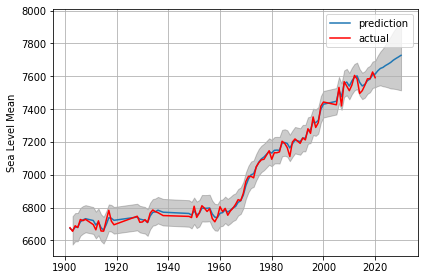

In [330]:
#plt.show()
plt.plot(df2,label='prediction')
plt.plot(df['Sea_level'],color='red',label='actual')
plt.fill_between(df3.index[1:],
                df3.iloc[1:, 0],
                df3.iloc[1:, 1], color='k', alpha=.2)

plt.ylabel('Sea Level Mean')
plt.legend()
plt.tight_layout()
plt.grid()
#plt.savefig('plots/IT_trend_prediction.png')
plt.show()